
========== 训练 Random Forest 模型 ==========

========== 训练 XGBoost 模型 ==========

========== 训练 DNN 模型 ==========

========== 绘制三种模型独立散点图 ==========


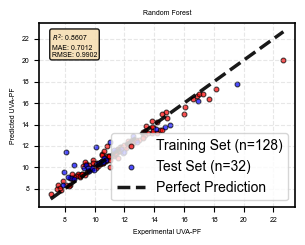

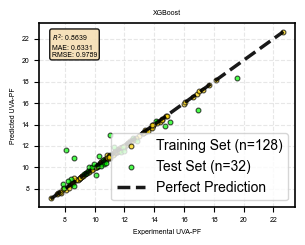

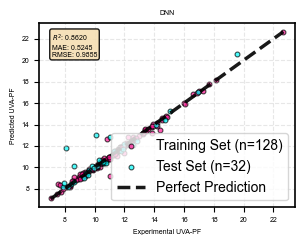


========== Starting SHAP Analysis for UVA-PF ==========


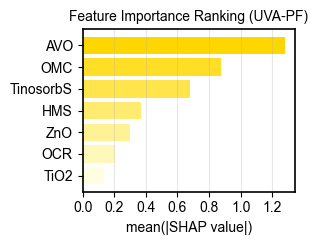

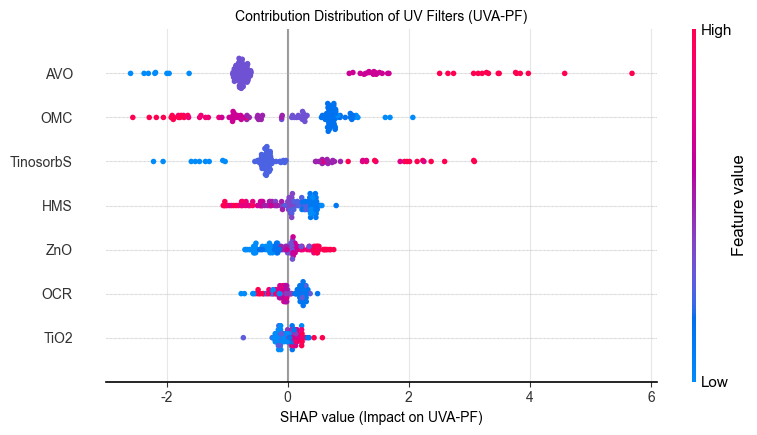

<Figure size 300x240 with 0 Axes>

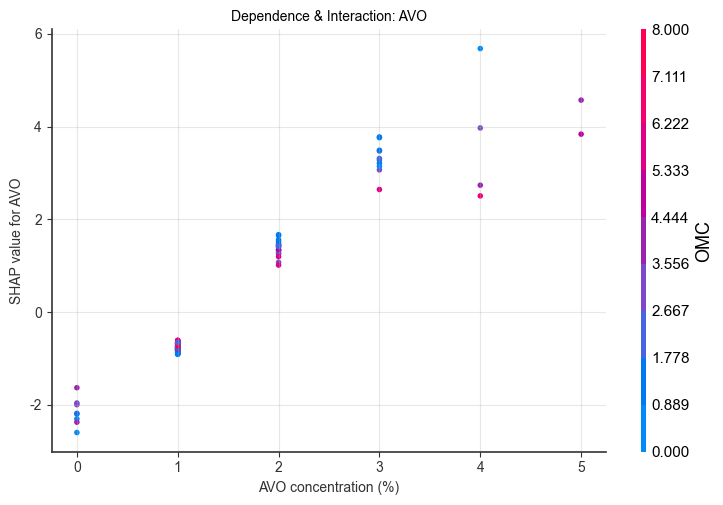

<Figure size 300x240 with 0 Axes>

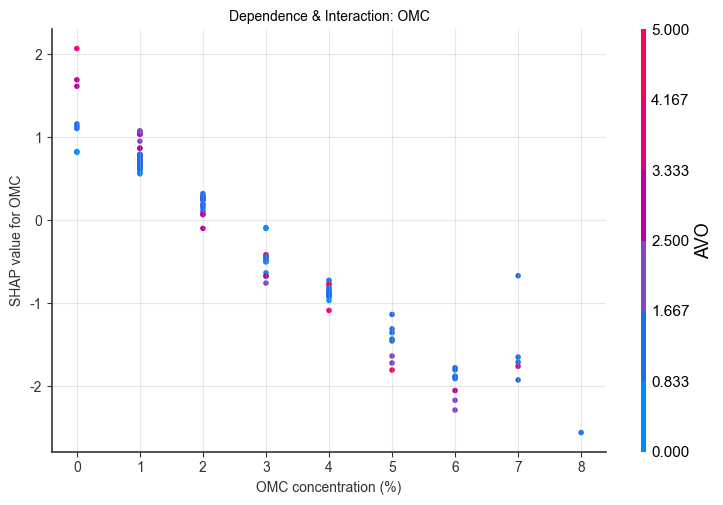

<Figure size 300x240 with 0 Axes>

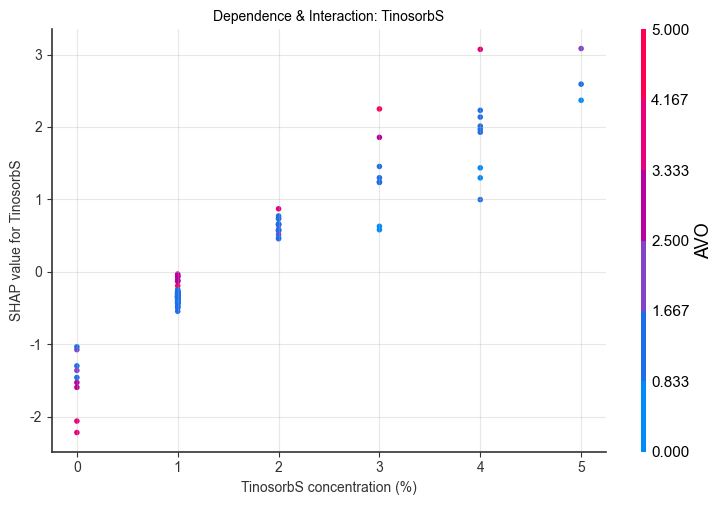


========== Antagonistic Analysis: ZnO Impact on HMS (UVA-PF) ==========


<Figure size 300x240 with 0 Axes>

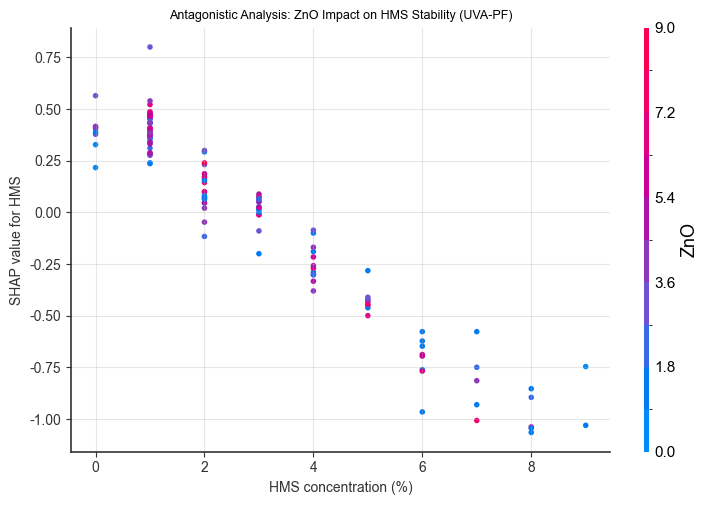


========== 所有流程完成 ==========


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import shap 
import matplotlib.colors as mcolors  
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

class GlobalParams:
   
    DATA_FILE_PATH = r"D:\桌面\sci论文\new\160组\数据\UVA-PF.xlsx"
    TEST_SIZE = 0.2 
    RANDOM_SEED = 22  
    FEATURE_NAMES = ['OMC', 'HMS', 'OCR', 'TiO2', 'AVO', 'TinosorbS', 'ZnO']
    
    PLOT_DPI = 300
    PLOT_FIGSIZE = (3, 2.4)  
    PLOT_FONT = 'Arial'
    SCATTER_SIZE = 12        
    SCATTER_MARKER = 'o'     
    SCATTER_EDGE_COLOR = 'black'  
    SCATTER_EDGE_WIDTH = 0.8 
    ALPHA = 0.7              
    FONT_SIZE = 5
    LEGEND_FONT_SIZE = 5

class ModelColor:
    RF_TRAIN = '#FF0000'
    RF_TEST = '#0000FF'
    XGB_TRAIN = '#FFD700'
    XGB_TEST = '#00FF00'
    DNN_TRAIN = '#FF1493'
    DNN_TEST = '#00FFFF'

class RFParams:
    n_estimators = 320        
    criterion = 'absolute_error'
    max_depth = None          
    min_samples_split = 2     
    min_samples_leaf = 1      
    min_weight_fraction_leaf = 0.0
    max_features = 1.0        
    max_leaf_nodes = None
    min_impurity_decrease = 0.0
    bootstrap = True          
    oob_score = False         
    n_jobs = -1               
    random_state = GlobalParams.RANDOM_SEED
    verbose = 0               
    warm_start = False
    ccp_alpha = 0.0           
    max_samples = None

class XGBParams:
    booster = 'dart'        
    n_estimators = 200        
    learning_rate = 0.2      
    max_depth = 3             
    min_child_weight = 1      
    gamma = 0.0               
    subsample = 1.0           
    colsample_bytree = 1.0    
    colsample_bylevel = 1.0
    colsample_bynode = 1.0
    reg_alpha = 0.0           
    reg_lambda = 1.0          
    scale_pos_weight = 1.0
    base_score = 0.6          
    random_state = GlobalParams.RANDOM_SEED
    objective = 'reg:squarederror'
    eval_metric = 'rmse'      
    seed = GlobalParams.RANDOM_SEED
    verbosity = 0
    n_jobs = -1
    importance_type = 'gain'  

class DNNParams:
    hidden_layer_sizes = (64, 32,16,4)
    activation = 'relu'       
    solver = 'adam'           
    alpha = 0.25              
    batch_size = 'auto'
    learning_rate = 'adaptive'
    learning_rate_init = 0.05 
    power_t = 0.2
    max_iter = 3000           
    shuffle = True
    random_state = GlobalParams.RANDOM_SEED
    tol = 1e-4                
    verbose = False
    warm_start = False
    momentum = 0.9
    nesterovs_momentum = True
    early_stopping = True     
    validation_fraction = 0.1 
    beta_1 = 0.9              
    beta_2 = 0.999
    epsilon = 1e-8
    n_iter_no_change = 20     
    max_fun = 15000

plt.rcParams.update({
    'font.family': GlobalParams.PLOT_FONT,      
    'font.size': GlobalParams.FONT_SIZE,      
    'axes.linewidth': 1.2,                     
    'lines.linewidth': 1.5,                    
    'savefig.dpi': GlobalParams.PLOT_DPI,      
    'savefig.bbox': 'tight',                  
    'axes.facecolor': 'white',                 
    'figure.facecolor': 'white',                
    'axes.unicode_minus': False,              
    'legend.fontsize': GlobalParams.LEGEND_FONT_SIZE+5,  
    'scatter.edgecolors': 'black'               
})


df = pd.read_excel(GlobalParams.DATA_FILE_PATH)
X = df[GlobalParams.FEATURE_NAMES].values
y = df['UVA-PF'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=GlobalParams.TEST_SIZE, 
    random_state=GlobalParams.RANDOM_SEED, 
    shuffle=True
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=RFParams.n_estimators,
        criterion=RFParams.criterion,
        max_depth=RFParams.max_depth,
        min_samples_split=RFParams.min_samples_split,
        min_samples_leaf=RFParams.min_samples_leaf,
        max_features=RFParams.max_features,
        bootstrap=RFParams.bootstrap,
        n_jobs=RFParams.n_jobs,
        random_state=RFParams.random_state,
        verbose=RFParams.verbose
    ),
    'XGBoost': XGBRegressor(
        booster=XGBParams.booster,
        n_estimators=XGBParams.n_estimators,
        learning_rate=XGBParams.learning_rate,
        max_depth=XGBParams.max_depth,
        min_child_weight=XGBParams.min_child_weight,
        gamma=XGBParams.gamma,
        subsample=XGBParams.subsample,
        colsample_bytree=XGBParams.colsample_bytree,
        reg_alpha=XGBParams.reg_alpha,
        reg_lambda=XGBParams.reg_lambda,
        objective=XGBParams.objective,
        eval_metric=XGBParams.eval_metric,
        random_state=XGBParams.random_state,
        n_jobs=XGBParams.n_jobs,
        verbosity=XGBParams.verbosity
    ),
    'DNN': MLPRegressor(
        hidden_layer_sizes=DNNParams.hidden_layer_sizes,
        activation=DNNParams.activation,
        solver=DNNParams.solver,
        alpha=DNNParams.alpha,
        learning_rate=DNNParams.learning_rate,
        learning_rate_init=DNNParams.learning_rate_init,
        max_iter=DNNParams.max_iter,
        random_state=DNNParams.random_state,
        verbose=DNNParams.verbose,
        early_stopping=DNNParams.early_stopping,
        validation_fraction=DNNParams.validation_fraction,
        n_iter_no_change=DNNParams.n_iter_no_change
    )
}

predictions = {}
metrics = {}

for name, model in models.items():
    print(f"\n========== 训练 {name} 模型 ==========")
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    predictions[name] = (y_train_pred, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    metrics[name] = {
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_rmse': train_rmse, 'test_rmse': test_rmse
    }

print("\n========== 绘制三种模型独立散点图 ==========")
model_color_map = {
    'Random Forest': (ModelColor.RF_TRAIN, ModelColor.RF_TEST),
    'XGBoost': (ModelColor.XGB_TRAIN, ModelColor.XGB_TEST),
    'DNN': (ModelColor.DNN_TRAIN, ModelColor.DNN_TEST)
}

for name in models.keys():
    plt.figure(figsize=GlobalParams.PLOT_FIGSIZE)
    ax = plt.gca()
    y_train_pred, y_test_pred = predictions[name]
    m = metrics[name]
    train_color, test_color = model_color_map[name]
    
    ax.scatter(y_train, y_train_pred, 
               color=train_color, 
               alpha=GlobalParams.ALPHA, 
               s=GlobalParams.SCATTER_SIZE,
               marker=GlobalParams.SCATTER_MARKER,
               edgecolor=GlobalParams.SCATTER_EDGE_COLOR,
               linewidths=GlobalParams.SCATTER_EDGE_WIDTH,  
               label=f'Training Set (n={len(y_train)})')
    ax.scatter(y_test, y_test_pred, 
               color=test_color, 
               alpha=GlobalParams.ALPHA, 
               s=GlobalParams.SCATTER_SIZE,
               marker=GlobalParams.SCATTER_MARKER,
               edgecolor=GlobalParams.SCATTER_EDGE_COLOR,
               linewidths=GlobalParams.SCATTER_EDGE_WIDTH, 
               label=f'Test Set (n={len(y_test)})')
    
    min_val = min(y.min(), y_train_pred.min(), y_test_pred.min())
    max_val = max(y.max(), y_train_pred.max(), y_test_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2.5, alpha=0.9, label='Perfect Prediction')
    
    textstr = f'$R^2$: {m["test_r2"]:.4f}\nMAE: {m["test_mae"]:.4f}\nRMSE: {m["test_rmse"]:.4f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.9) 
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=5, verticalalignment='top', bbox=props)
    
    ax.set_title(name, fontsize=GlobalParams.FONT_SIZE)
    ax.set_xlabel('Experimental UVA-PF', fontsize=GlobalParams.FONT_SIZE)
    ax.set_ylabel('Predicted UVA-PF', fontsize=GlobalParams.FONT_SIZE)
    ax.grid(alpha=0.3, linestyle='--') 
    ax.legend(loc='lower right', fontsize=GlobalParams.LEGEND_FONT_SIZE+5)  
    
    plt.tight_layout()
    plt.show()

print("\n========== Starting SHAP Analysis for UVA-PF ==========")

explainer_model = models['XGBoost']
explainer = shap.TreeExplainer(explainer_model)
shap_values = explainer.shap_values(X_train_scaled)
X_display = pd.DataFrame(X_train, columns=GlobalParams.FEATURE_NAMES)

plt.figure(figsize=GlobalParams.PLOT_FIGSIZE)
shap_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(shap_importance)[::-1]  
sorted_importance = shap_importance[sorted_idx]
sorted_features = [GlobalParams.FEATURE_NAMES[i] for i in sorted_idx]

yellow_cmap = mcolors.LinearSegmentedColormap.from_list('yellow_gradient', ['#FFD700', '#FFFFE0'])
colors = yellow_cmap(np.linspace(0, 1, len(sorted_features)))

plt.barh(np.arange(len(sorted_features)), sorted_importance, color=colors)
plt.yticks(np.arange(len(sorted_features)), sorted_features, fontsize=GlobalParams.FONT_SIZE+5)
plt.title('Feature Importance Ranking (UVA-PF)', fontsize=GlobalParams.FONT_SIZE+5)
plt.xlabel('mean(|SHAP value|)', fontsize=GlobalParams.FONT_SIZE+5)
plt.xticks(fontsize=GlobalParams.FONT_SIZE+5)
plt.gca().invert_yaxis()  
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

plt.figure(figsize=GlobalParams.PLOT_FIGSIZE)
shap.summary_plot(shap_values, X_display, show=False)
plt.title('Contribution Distribution of UV Filters (UVA-PF)', fontsize=GlobalParams.FONT_SIZE+5)
plt.xlabel('SHAP value (Impact on UVA-PF)', fontsize=GlobalParams.FONT_SIZE+5)
plt.xticks(fontsize=GlobalParams.FONT_SIZE+5)
plt.yticks(fontsize=GlobalParams.FONT_SIZE+5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

top_3_indices = np.argsort(np.abs(shap_values).mean(0))[-3:][::-1]
top_3_features = [GlobalParams.FEATURE_NAMES[i] for i in top_3_indices]

for feat in top_3_features:
    plt.figure(figsize=GlobalParams.PLOT_FIGSIZE)
    shap.dependence_plot(feat, shap_values, X_display, interaction_index='auto', show=False)
    
    ax = plt.gca()
    ax.set_title(f'Dependence & Interaction: {feat}', fontsize=GlobalParams.FONT_SIZE+5)
    ax.set_xlabel(f'{feat} concentration (%)', fontsize=GlobalParams.FONT_SIZE+5)
    ax.set_ylabel(f'SHAP value for {feat}', fontsize=GlobalParams.FONT_SIZE+5)
    
    for text in ax.figure.texts:
        if text.get_text() in GlobalParams.FEATURE_NAMES or '=' in text.get_text():
            text.set_fontsize(GlobalParams.FONT_SIZE + 3)
    
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(GlobalParams.FONT_SIZE+5)
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
    ax.grid(True, alpha=0.3)
    ax.title.set_fontsize(GlobalParams.FONT_SIZE+5)
    
    plt.tight_layout()
    plt.show()

print("\n========== Antagonistic Analysis: ZnO Impact on HMS (UVA-PF) ==========")
plt.figure(figsize=GlobalParams.PLOT_FIGSIZE)
shap.dependence_plot(
    "HMS", shap_values, X_display, 
    interaction_index="ZnO", show=False
)
ax = plt.gca()
for text in ax.figure.texts:
    if text.get_text() in GlobalParams.FEATURE_NAMES or '=' in text.get_text():
        text.set_fontsize(GlobalParams.FONT_SIZE + 3)

ax.set_title('Antagonistic Analysis: ZnO Impact on HMS Stability (UVA-PF)', fontsize=9)
ax.set_xlabel('HMS concentration (%)', fontsize=GlobalParams.FONT_SIZE+5)
ax.set_ylabel('SHAP value for HMS', fontsize=GlobalParams.FONT_SIZE+5)
for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(GlobalParams.FONT_SIZE+5)
plt.grid(alpha=0.3)
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
plt.tight_layout()
plt.show()

print("\n========== 所有流程完成 ==========")